### CE 103- INTRODUCTION TO COMPUTERS and PROGRAMMING

### _The topics of the week !_

- Linear Least Square Fitting 
- Linear Regression
- Curve Fitting
- Interpolation - Extrapolation

In science and engineering, there are theoretical curve or fitting function, which is one of the most important tasks, that we would like to fit some experimental data. It is useful to estimate values which are not given in the range. Fitting function has the form _f(x;a,b,c,...)_, where _"x"_ is the independent variable and _"a,b,c,.."_ are parameters. 

Curve fitting is a common use of least-squares minimization, which is the process of comparing a set of data to a continuous set of points. To find a better fitting line, exponential and logarithmic graphs can ben used. 
      

### Polynomial fitting using polyfit()

y = ax + b  --> 1st degree equation

y = ax^2 + bx + c --> 2nd degree equation

y = ax^3 + bx^2 + cx + d --> 3rd degree equation

![](./Figures/slope-int.png)


Lets use **"polyfit()"** to to fit a straight line to a set of [x,y] data. Here the fitting function is **_" f(x) = a + bx "_** which refers a linear in the fitting parameters a and b.   

The **polyfit()** function asks for the degree of the polynomial that we wish to fit the data to, but it doesn't require the definition of the curve function that we want to fit the data. 

Additional to **polyfit()** function, there is another function of Numpy which takes real number list and returns a polynomial called **poly1d()** function. The first number of the list refers to the coefficeint of the highest power (n) term and decrease with (n-1) till the last term. The **poly1d()** function also defines polynomial function and makes it easier to apply a polynomial. 


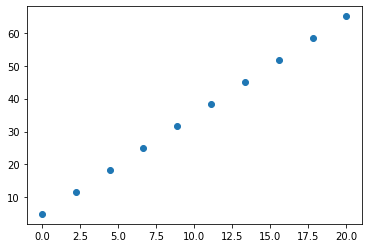

In [1]:
# Simplest way to fit the data with a one degree polynomial

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x = np.linspace(0,20,10)
y = 3 * x + 5

plt.plot(x, y, 'o')
plt.show()

In [27]:
# define polynomial coefficients

n = 1                             # set the degree of function
poly_coeff = np.polyfit(x, y, n)
poly_coeff

array([ 3., -8.])

In [28]:
p1 = np.poly1d([3, 5, 8])    # set new values to y using the polynomial coefficients that calculated previously
print(p1)
print('')
print('')

p2 = np.poly1d([7, 5, 2, 4])    # set new values to y using the polynomial coefficients that calculated previously
print(p2)
print('')
print('')

# Define roots of the polynomial ( the values of x which p(x) = 0 )
p3 = np.poly1d([3, 5, 8], True)   # represents (x-3)(x-5)(x-8)
print(p3)

   2
3 x + 5 x + 8


   3     2
7 x + 5 x + 2 x + 4


   3      2
1 x - 16 x + 79 x - 120


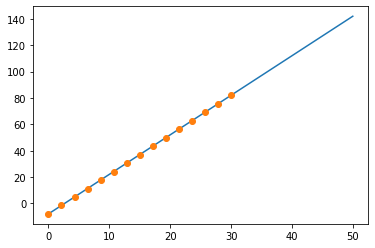

In [29]:
# plot the line fit

xnew = np.linspace(0, 50, 10)   # set new values to x
ynew = np.poly1d(poly_coeff)    # set new values to y using the polynomial coefficients that calculated previously

plt.plot(xnew, ynew(xnew), x, y, 'o')
plt.show()

---

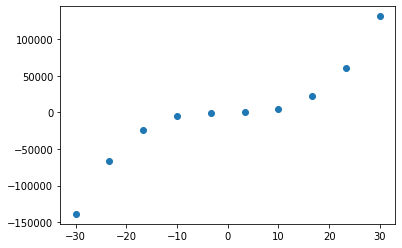

array([ 5., -4.,  3., -2.])

In [30]:
# do the same process for a 3rd degree polynomial
np.random.seed(0)

x = np.linspace(-30, 30, 10)
y = 5 * x**3 - 4 * x**2 + 3 * x - 2
plt.plot(x, y, 'o')
plt.show()

poly_coeff = np.polyfit(x, y, 3)     # define polynomial coefficients
poly_coeff

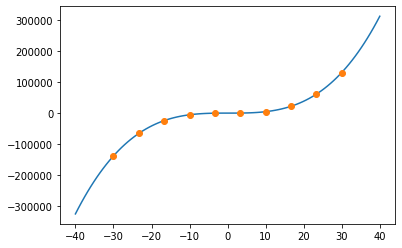

In [31]:
# plot the 3rd order line fit

poly_coeff = [5., -4.,  3., -2.]

xnew = np.linspace(-40, 40, 100)    # lets' set new values to x 
ynew = np.poly1d(poly_coeff)        # set new values to y using the polynomial coefficients that calculated previously

plt.plot(xnew, ynew(xnew), x, y, 'o')
plt.show()

#x = np.linspace(-30, 30, 10)
#ynew = np.poly1d(poly_coeff)
#plt.plot(x, ynew(x), x, y, 'o')


 
[-0.31661095  8.44122256 13.29583012 18.91407885 23.64545291 33.18537473
 36.69764953 49.48482201 56.91985008 55.22532412 67.36986482 70.11881459
 77.095481   88.52978151 82.99450481]
 


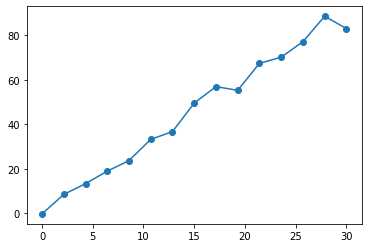

In [32]:
# lets fit a line to a distributed data 
np.random.seed(0)

x = np.linspace(0, 30, 15)
y = 3 * x - 8
ynew = y + 14 * np.random.rand(15)

print(" ")
print(ynew)
print(" ")

plt.plot(x, ynew, '-o')
plt.show()

 
[-0.01216008  3.33647199 -0.82867224]
 
          2
-0.01216 x + 3.336 x - 0.8287
 


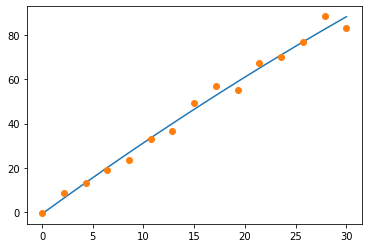

In [34]:
coeff_new = np.polyfit(x, ynew, 2)  # calculate the coefficients ([-0.01216008  3.33647199 -0.82867224]) of the function 

fit = np.poly1d(coeff_new)          # define polynimial with these coefficients
#fit = np.poly1d(coeff_new, True)   # define polynimial by using roots of it

print(" ")
print(coeff_new)
print(" ")
print(fit)
print(" ")

plt.plot(x, fit(x), x, ynew, 'o')
plt.show()

###  Higher order polynomial fit

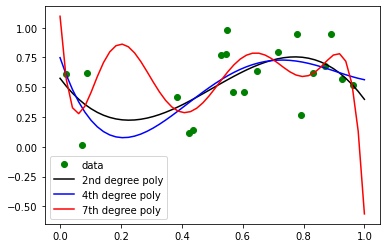

In [35]:
np.random.seed(0)

x = np.random.rand(20)
y = np.random.rand(20)

second = np.polyfit(x, y, 3)    # fit the data with a 4th degree polynomial
fit_3  = np.poly1d(second)      # construct the polynomial 

fourth = np.polyfit(x, y, 4)    # fit the data with a 4th degree polynomial
fit_4  = np.poly1d(fourth)      # construct the polynomial 

svnth = np.polyfit(x, y, 7)     # fit the data with a 7th degree polynomial
fit_7 = np.poly1d(svnth)

xnew = np.linspace(0, 1, 50)
plt.plot(x, y, 'go', xnew, fit_3(xnew), '-k', xnew, fit_4(xnew),'-b', xnew, fit_7(xnew),'-r')
plt.legend(['data',  '2nd degree poly', '4th degree poly', '7th degree poly'])
plt.show()

### Finding the value of a function at any point

We may want to calculate the value of data, at some point which we don't know. For one degree linear equation its very east to calculate it, if we alreeady know the function coefficients.

In [36]:
fit_4(0.4)

0.32427272720168776

In [11]:
fit_7(0.2)

0.8623182708651416

---
## Linear Regression 

It is a very powerful and usually the first _**machine learning algorithm**_ that one can assume a linear relationship between the input variables (or independent variable) and the single output variable (or dependent variable). The explanatory (dependent) variable can be calculated from a linear combination of the input variables.

![](./Figures/lin-reg-fig.png)


Linear Regression is a statistical approach. Its used to find relationship between a dependent variable with a given set of independent variables. The method called "Single Linear Regression" when there is a single input variable, and, its called "Multiple Linear Regression" when there are multiple input variables.


The linear regression model can be represented by the equation below;

![](./Figures/lin-reg-formula.png)

    - resp(Xi) refers to the predicted response value for ith observation
    - Q0 and Q1 are regression coefficients
        -Q0 --> y intercept
        -Q1 --> slope of regression line


In order to predict the response value, regression coefficients has to be known or estimated. The **_least-square method_** is a way to do so. 


### Linear Least Square Fitting

Lets assume, we have a flat Earth model, that seismic waves travel through layers. As wave propagates away from the source, the travel time increases with increasing distance. For a direct wave travels directly through the first layer, its' travel time is given by the following linear equation;

        T(x) = x / Vo

![](./Figures/travel-time_directwave.png)


Figure shows first arrival direct wave travel time-distance linear curve fitting. Slope of the linear fit, gives the velocity of the direct wave as km/sec.

_Lets define a realtionship between data points and plot a line of linear regression._

In the example below, x axis represents the distance between earthquake source and seismic station in km, y axis represents travel time of the seismic waves beneath Earth's interior.


*** The mp4 video below is from https://www.iris.edu/hq/inclass/animation/traveltime_curves_how_they_are_created


In [12]:
%%HTML
<video controls>                                                           
<source src="./Figures/Z_TravelTimeCurve.mp4"type="video/mp4">                                               
</video>



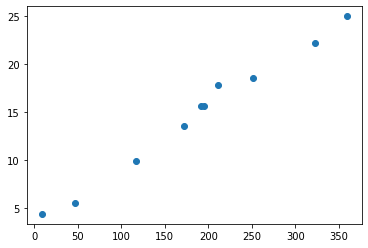

In [13]:
# Lets define a relationship between data points and plot a line of linear regression.

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

dist = [ np.random.randint(0,500) for item in range(10)]          # Source - receiver distance
dist.sort()

tt = [0.05 * item + np.random.randint(0,10) for item in dist]     # P wave travel time
tt.sort()

plt.scatter(dist, tt)
plt.show()

In [14]:
coeff = np.polyfit(dist,tt,1)    # calculate coefficents
print(coeff)    

[0.06042368 3.4445168 ]


 
0.06042 x + 3.445
 


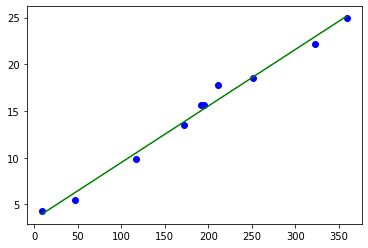

In [15]:
p = np.poly1d(coeff)           # fit a line for each y value as a function of x

print(p)
print(" ")

plt.plot(dist, tt, 'bo', dist, p(dist), '-g')
plt.show()

---

**_Linear Regression_** is a basic technique to predict an output variable by using historical data. This is the first step for Machine Learning algorithms. 

![](./Figures/regression-curve.png)

The main idea is to use a linear regression fit model of the observed data, to predict any future values. 

There are two kinds of variables in linear regression model such as, input(or prediction varibale) referred as X, and output variable that we want to predict which referred as Y, in general.

Lets assume we have an seismic moment (M0) which is the input or predictor variable that help to predict the value of output variable. The output variable will be earthquake magnitude (M) in this situation, which is depends on the input variable.

To estimate the magnitude of an earthquake, assume the equation as below;

    M = 1.5 M0 - 10.7
    
The goal in here is to calculate values of paramaters (1.5 and -10.7 in this problem) to minimize the difference between M0 and M. So, best fitted line will be used to predict the values of M, given the value of M0. 

---

# Linear Interpolation and Extrapolation

The guess of data points in the range of the data set in called Interpolation, while the guess of data points out of the range of data set is called Extrapolation.

Coefficients: [-8.08162804e-05  4.72715920e-03 -8.24652284e-02  4.00635993e-01
  3.00200960e-01]
 
            4            3           2
-8.082e-05 x + 0.004727 x - 0.08247 x + 0.4006 x + 0.3002
 


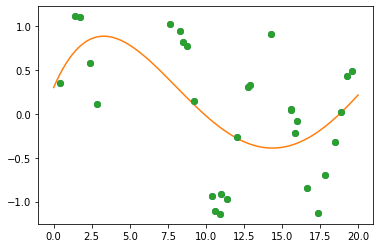

In [16]:
# do the same process for a 3rd degree polynomial
np.random.seed(0)


x = 20 * np.random.rand(30)
y = np.sin(x) + 0.1 * np.random.randn(30)
plt.plot(x, y, 'o')

poly_coeff = np.polyfit(x, y, 4)     # define polynomial degree to find the best fit line
print('Coefficients:', poly_coeff)

# plot the line fit

xnew = np.linspace(0, 20, 100)      # set new values to x
ynew = np.poly1d(poly_coeff)        # set new values to y using the polynomial coefficients that calculated previously

print(" ")
print(ynew)
print(" ")

plt.plot(xnew, ynew(xnew), x, y, 'o')
plt.show()

In [17]:
ynew(5)    # the value out of the dataset, which is calculated by linear regression fit model

0.78213494105448

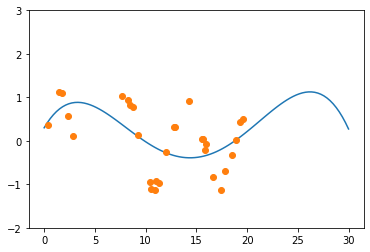

In [18]:
# plot the line fit again

Xxnew = np.linspace(0, 30, 100)     # set new values to x
Yynew = np.poly1d(poly_coeff)       # set new values to y using the polynomial coefficients that calculated previously

plt.ylim(-2,3)
plt.plot(Xxnew, Yynew(Xxnew), x, y, 'o')
plt.show()


In [19]:
Yynew(5)         # the value out of the dataset, which is calculated by linear regression fit model

0.78213494105448

In [20]:
Yynew(25)         # the value out of the dataset, which is calculated by linear regression fit model

1.0683360541118812

---
## Homework #7

Please visit the https://data.ibb.gov.tr open data portal of Istanbul Metropolitan Municipality. The specified data link for your assignment is https://data.ibb.gov.tr/dataset/7b36039a-c836-4292-8b3b-2d2202bf7af6/resource/c2f15653-a0e6-4c9d-bec4-37cecb0d7194/download/spor-organizasyonlar-ve-sporcu-saylar.xlsx .

Please follow the instructions below;

1. plot "Year" versus "Number of Athletes" graph by using the given dataset
2. Define a linear model that best fit with the dataset 
3. Predict the "Number of Athletes" value for the year 2030 which is out of the given dataset (Assuming that there is no Covid-19)

![](./Figures/hw7-ibb.png)

PS : Do not forget to upload your answer sheets to CE_103 Class on MS Teams.

---